In [ ]:
#Import some libraries to perform some calculations, visualization, plotting, remove warnings and other usage of functions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the train dataset of CAR and stored in variable called car:

car = pd.read_csv('/content/train_qWM28Yl.csv')
car

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


## *Basic Pandas*

In [ ]:
#This command gives the information of given dataset:

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
#This command gives the static information of given dataset:

car.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
#This command shows the first 5 rows of given dataset:

car.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
#This command shows the last 5 rows of given dataset:

car.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.124429,0.02,0.442308,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [ ]:
#This command shows the columns of given dataset:

car.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [ ]:
#This command shows the order pair of given dataset:

car.shape

(58592, 44)

In [ ]:
#This command gives the missing values of given dataset:

car.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
#This command gives the duplicated values  of given dataset:

car.duplicated().sum()

0

In [ ]:
#This command groups the target column ("is_claim") into all other columns.
#Following cammand shows the relationship between target and other column:

gp = car.groupby('is_claim').count()
gp

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
is_claim,,,,,,,,,,,,,,,,,,,,,
0,54844,54844,54844,54844,54844,54844,54844,54844,54844,54844,...,54844,54844,54844,54844,54844,54844,54844,54844,54844,54844
1,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,...,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748


In [ ]:
#This command counts the value of target column:

car.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

## *Visualization:*

<Axes: xlabel='is_claim', ylabel='count'>

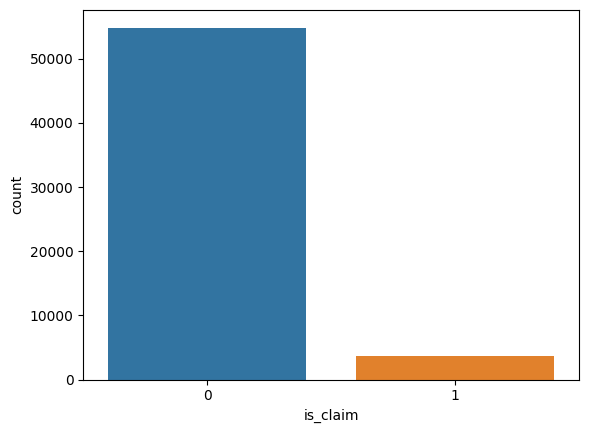

In [ ]:
# This command shows the value of target column in the form of graph:

sns.countplot(x= car['is_claim'], data=car)

The difference between 0 and 1 is huge, due to class Im-Balancing problem:
After some codes this problem will we solved:

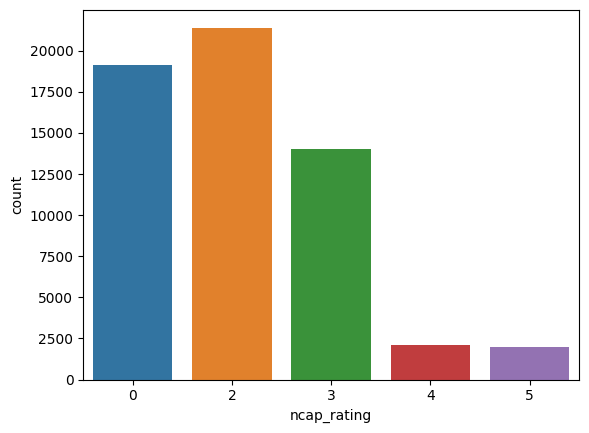

In [ ]:
#This command shows the ncap_rating in the form of graph:

sns.countplot(x = 'ncap_rating', data = car)
plt.xlabel('ncap_rating')
plt.show()

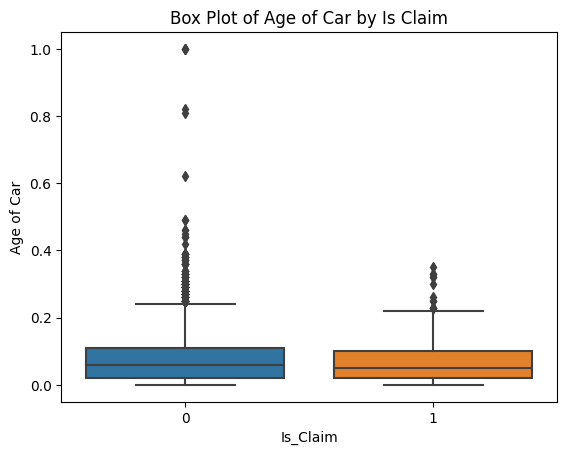

In [ ]:
#This commad is used to show the outliers in target column:

sns.boxplot(x='is_claim', y='age_of_car', data=car)
plt.xlabel('Is_Claim')
plt.ylabel('Age of Car')
plt.title('Box Plot of Age of Car by Is Claim')
plt.show()

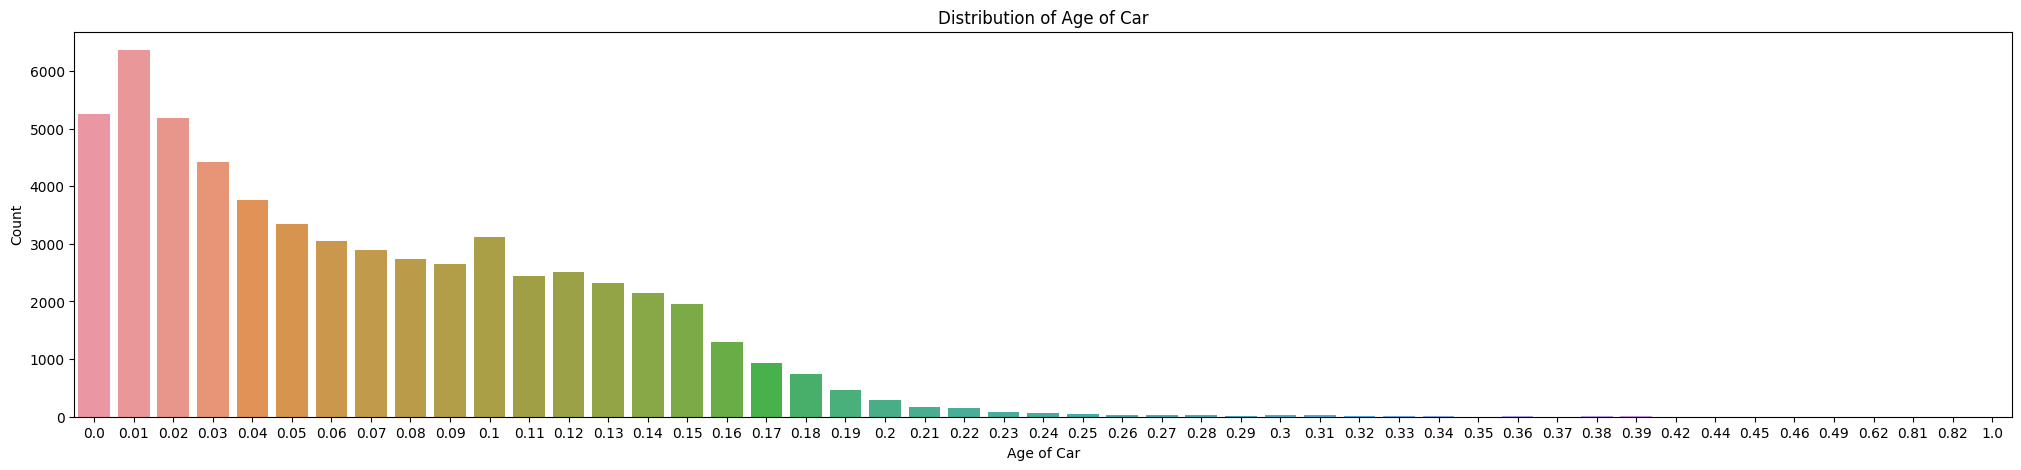

In [ ]:
#This command shows the age_of_car column in graphical view:

plt.figure(figsize = (25,5))
sns.countplot(x='age_of_car', data=car)
plt.xlabel('Age of Car')
plt.ylabel('Count')
plt.title('Distribution of Age of Car')
plt.show()

In [ ]:
#This command is used to identify the co-relation of entire dataset:

car.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.173280,0.078747
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.348853,-0.028172
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,-0.031628,0.022435
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.060359,-0.090983,-0.091591,-0.056640,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.071150,-0.017808
make,0.086101,0.188122,-0.031989,-0.035125,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.000456
airbags,0.103981,0.209073,-0.008041,-0.060359,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,0.002789
displacement,0.194361,0.393208,-0.023764,-0.090983,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.007678
cylinder,0.191185,0.379522,0.004183,-0.091591,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.013434
gear_box,0.095305,0.201579,-0.003115,-0.056640,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.000635
turning_radius,0.166426,0.332716,-0.016764,-0.077501,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,0.002724


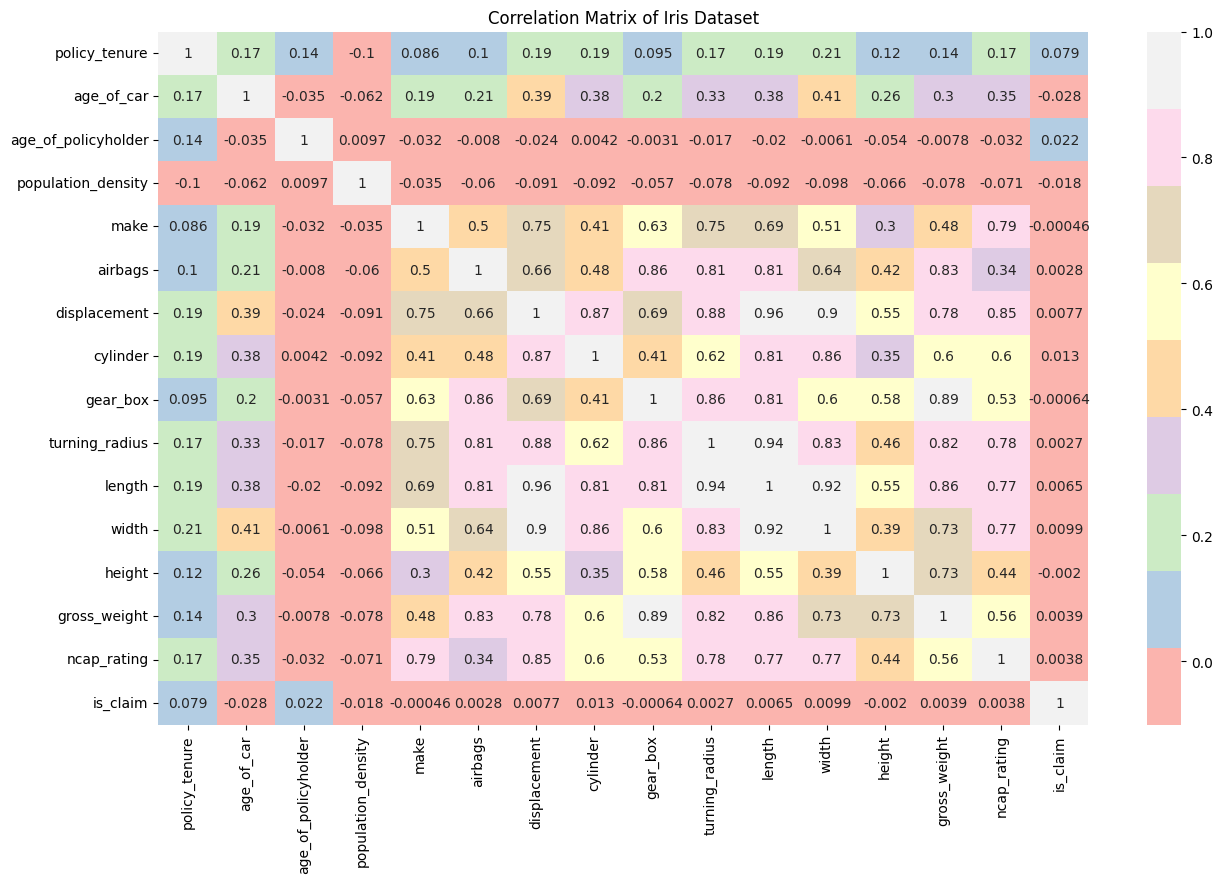

In [ ]:
#This command convert the co-relation into heatmap:
#Graphical view of co-relation from heatmap:

correlation_matrix = car.corr()
plt.figure(figsize = (15,9))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

##*Drop Poilcy_ID Column, Label Encoding at different columns, Split data into train-test model*

In [ ]:
#Import some libraries for label encoding, accurarcy and other:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#This command is used to drop the policy_id column:

car1 = car
car1= car1.drop('policy_id', axis=1)

In [ ]:
# This command extract the categorical columns:

catFeatures= [col for col in car1.columns if col in
              car1.select_dtypes(include=object).columns]

# # Extracting All Features:
features = [col for col in car1.columns if col not in ['is_claim']]

print(features)
print(catFeatures)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']
['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is

In [ ]:
# This command is used to Split Features and Target Variable:

X = car1.loc[:, features]
# Checking Dataset Shape (Features):
print(X.shape)



(58592, 42)


In [ ]:
# This command is used to Split Features and Target Variable:

y=car[['is_claim']]
# Checking Dataset Shape (Features):
print(y.shape)

(58592, 1)


In [ ]:
# This command is used to put label_Encoding into Categorical columns:

labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    X[col] = labelEncode.fit_transform(car1[col])

In [ ]:
#After apply label_Encoding all categorical columns is converted into numerical columns:

X.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,1,2
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,0,1,1,1,0,1,1,1,2


In [ ]:
y

,is_claim
0,0
1,0
2,0
3,0
4,0
...,...
58587,0
58588,0
58589,0
58590,0


In [ ]:
#This command split given dataset into test and train:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#This command shows the order pair of test and train

print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (43944, 42)
shape of Y_train:  (43944, 1)
shape of X_test:  (14648, 42)
shape of Y_test:  (14648, 1)


## *Classification Model --> "Logistic Regression"*

In [ ]:
#Import Logistic Regression libraries:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#Fit the model:

model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Calculate accuracy score:

y_pred = model.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

93.5417804478427


Due to class im-blancing problem. Linear Regression Model overfit values

In [ ]:
# This command is used to draw confussion matrix:

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print("Confusion Matrix")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Confusion Matrix
[[13702     0]
 [  946     0]]


## *Apply Smote Function*

Apply SMOTE function for resolving class imbalancing issue:

Due to this import SMOTE library and again split the data into test and train;

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_re, y_re = sm.fit_resample(X, y)
X_train, X_test, Y_train, Y_test = train_test_split(X_re, y_re, test_size = 0.25)

In [ ]:
#This command shows the order pair of test and train after SMOTE function:

print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (82266, 42)
shape of Y_train:  (82266, 1)
shape of X_test:  (27422, 42)
shape of Y_test:  (27422, 1)


## *Classification Model --> "Logistic Regression"*

In [ ]:
#Import Logistic Regression libraries:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Fit the Model:

model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Calculate accuracy score:

y_pred = model.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

51.644664867624535


In [ ]:
# This command is used to draw confussion matrix:

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print("Confusion Matrix")
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Confusion Matrix
[[6309 7342]
 [5918 7853]]


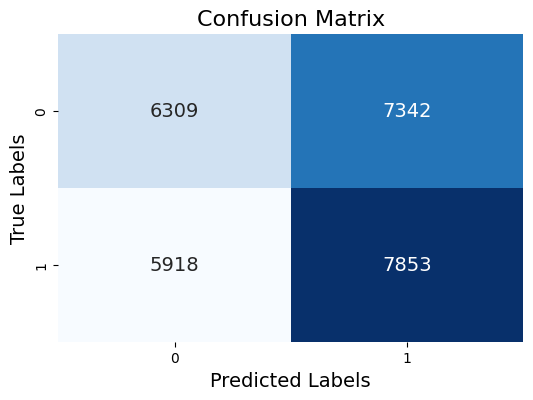

In [ ]:
# This command is used to draw a heatmap of confussion matrix:

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
plt.xlabel('Predicted Labels', fontsize = 14)
plt.ylabel('True Labels', fontsize = 14)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

*Class Im-balancing problem is vanish but model accuracy is very low, for raising the model accuracy we can tune it's parameter by using "HYPERPARAMETER TUNNING".*

In [ ]:
# This command is used to store parameters for hyper parameter tunning:

param_g = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [ ]:
#Import library:

from sklearn.model_selection import GridSearchCV

In [ ]:
# This command is used to develop the model:

clf = GridSearchCV(model, param_grid = param_g, cv = 10, verbose = True, n_jobs = -1)

In [ ]:
#Fit the model:

LR_grid = clf.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [ ]:
# This command is used to show best parameter and best index:

print('Best hyperparameters are: '+str(LR_grid.best_params_))
print('Best index is: '+str(LR_grid.best_index_))

Best hyperparameters are: {'C': 0.001, 'penalty': 'l2'}
Best index is: 1


In [ ]:
# This command is used to calculate accurary:

score = (LR_grid.best_score_)
accuracy = score*100
print(accuracy)

93.60322236959911


## *Classification Model --> "Decision Tree"*

In [ ]:
#Import decesion tree classifier library and develop the model:

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
# Fit model:

dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#This command is used to calculate accuracy of the model:

y_pred = dtc.predict(X_test)
score = accuracy_score(Y_test, y_pred)
accuracy = score*100
print(accuracy)

91.5031726351105


In [ ]:
# This command is used to draw confussion matrix:

from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)
print("Confusion Matrix")
cm_dtc = confusion_matrix(Y_test, y_pred)
print(cm_dtc)

Confusion Matrix
[[12397  1254]
 [ 1076 12695]]


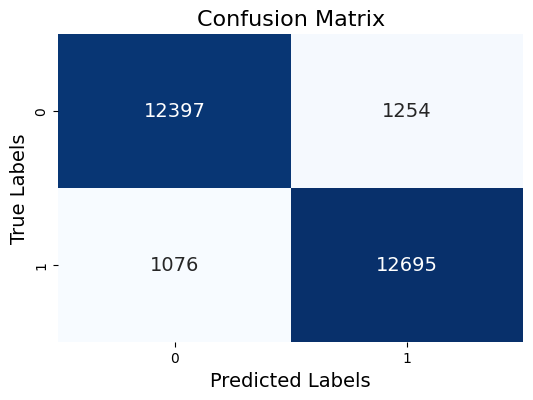

In [ ]:
# This command is used to draw a heatmap of confussion matrix:

plt.figure(figsize = (6, 4))
sns.heatmap(cm_dtc, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
plt.xlabel('Predicted Labels', fontsize = 14)
plt.ylabel('True Labels', fontsize = 14)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()